# TASK 2<br>SYNC INTERN MAY 2023<br>REALTIME FACE MASK DETECTION

In [3]:
# importing the necessary libraries
import numpy as np
import keras
import shutil
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# define image paths
mask = r'C:\Users\HP\Desktop\Mask\\'
no_mask = r'C:\Users\HP\Desktop\No_Mask\\'

In [5]:
# check total number of unmask images
no_of_unmask_pics = os.listdir(no_mask)
len(no_of_unmask_pics)

131

In [6]:
# total number of mask images
no_of_mask_pics = os.listdir(mask)
len(no_of_mask_pics)

208

In [10]:
# let's create a directory for training and testing folder
os.makedirs(r'C:\Users\HP\Desktop\train\masks')
os.makedirs( r'C:\Users\HP\Desktop\train\no_masks')
os.makedirs( r'C:\Users\HP\Desktop\test\masks')
os.makedirs( r'C:\Users\HP\Desktop\test\no_masks')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\HP\\Desktop\\train\\masks'

In [ ]:
# randomly select 100 images for training and 30 images for testing 
# from each mask and non-masked folder and create a loop function
for images in random.sample(no_of_mask_pics, 100):
    shutil.copy(mask+images, 'Desktop/train/masks')
for images in random.sample(no_of_mask_pics, 30):
    shutil.copy(mask+images, 'Desktop/test/masks')
for images in random.sample(no_of_unmask_pics, 100):
    shutil.copy(no_mask+images, 'Desktop/train/no_masks')
for images in random.sample(no_of_unmask_pics, 30):
    shutil.copy(no_mask+images, 'Desktop/test/no_masks')

In [7]:
# use augmented method to get differnt forms of each image because they are few
train_batch = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2).\
            flow_from_directory(r'C:\Users\HP\Desktop\train', target_size=(224,224), batch_size=32, class_mode = 'categorical')
test_batch = ImageDataGenerator(rescale=1./255).\
            flow_from_directory(r'C:\Users\HP\Desktop\test', target_size = (224,224), batch_size=32, class_mode='categorical')

Found 198 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [8]:
# training and testing folder has 198 and 60 images respectively with 2 classes.
train_batch.class_indices

{'masks': 0, 'no_masks': 1}

In [9]:
# create a list with mask representng 0 while non_mask representing 1
class_mask = ['mask', 'no mask']

In [10]:
# use a powerful pretrained model VGG16 to get high accuracy
# but first import vgg16
from keras.applications.vgg16 import VGG16
# vgg16 accepts image size (224,224) only
IMAZE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAZE_SIZE+[3], weights='imagenet', include_top=False)

In [11]:
# check how the model looks or works 
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# We see that trainable parameter is 14,714,688. As the model is already trained we will avoid this.
for layers in vgg.layers:
    layers.trainable = False

In [13]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# let's add layers to the model
flatten_layer = keras.layers.Flatten()(vgg.output)
prediction_layer = keras.layers.Dense(2, activation='softmax')(flatten_layer)

In [15]:
# create the model
model = keras.models.Model(inputs = vgg.input, outputs = prediction_layer)

In [16]:
# check model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
# lets compile now
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# train the model
r = model.fit_generator(train_batch, validation_data=test_batch, epochs=5, steps_per_epoch=len(train_batch), 
                        validation_steps=len(test_batch))

C:\Users\HP\AppData\Local\Temp\ipykernel_15424\1758160794.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_batch, validation_data=test_batch, epochs=5, steps_per_epoch=len(train_batch),


Epoch 1/5
7/7 [==============================] - 111s 16s/step - loss: 0.4559 - accuracy: 0.8182 - val_loss: 0.3605 - val_accuracy: 0.8167
Epoch 2/5
7/7 [==============================] - 109s 16s/step - loss: 0.4452 - accuracy: 0.8131 - val_loss: 0.3712 - val_accuracy: 0.8500
Epoch 3/5
7/7 [==============================] - 103s 15s/step - loss: 0.2396 - accuracy: 0.9141 - val_loss: 0.1941 - val_accuracy: 0.9333
Epoch 4/5
7/7 [==============================] - 102s 15s/step - loss: 0.2259 - accuracy: 0.9091 - val_loss: 0.1546 - val_accuracy: 0.9500
Epoch 5/5
7/7 [==============================] - 99s 14s/step - loss: 0.1398 - accuracy: 0.9596 - val_loss: 0.1163 - val_accuracy: 0.9500


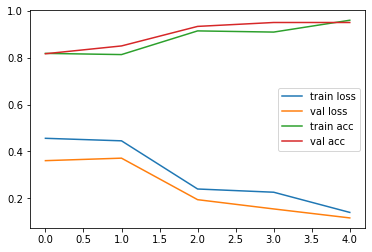

In [20]:
# show in visualization
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

In [29]:
# Lets test our model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.imagenet_utils import preprocess_input

1/1 [==============================] - 4s 4s/step
mask


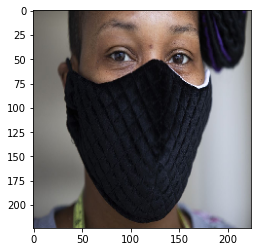

In [30]:
# use any picture to test now
img = image.load_img(r"C:\Users\HP\Desktop\Mask\Mask197.jpg", target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x,0)
y = preprocess_input(x)
pred = class_mask[np.argmax(model.predict(y))]
print(pred)
plt.imshow(img)

1/1 [==============================] - 0s 438ms/step
no mask


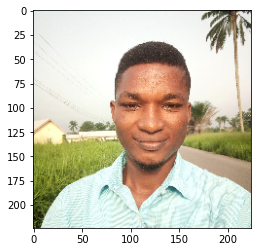

In [31]:
# use any picture to test now
img = image.load_img(r"C:\Users\HP\Pictures\df.jpg", target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x,0)
y = preprocess_input(x)
pred = class_mask[np.argmax(model.predict(y))]
print(pred)
plt.imshow(img)